In [3]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [4]:
path_format = '/home/ericwang0533/random_needles/random_needles/exps/contextual/coin_flip_icl_double_dist/meta-llama_Llama-3.1-8B-Instruct/icl_{icl_value}/cutoff_{cutoff}/bias_{p_bias}_{q_bias}/stats.pkl'


def load_data(icl_value, cutoff, p_bias, q_bias):
    path = path_format.format(icl_value=icl_value, cutoff=cutoff, p_bias=p_bias, q_bias=q_bias)
    with open(path, 'rb') as f:
        return pickle.load(f)

In [5]:
load_data(100, 10, 0, 10)

{'avg_p_heads': np.float64(0.14451171875),
 'var_p_heads': np.float64(0.003701893901824951),
 'bias_1': '0',
 'bias_2': '10',
 'cutoff': '10',
 'icl_len': 100}

In [6]:
icl_values = [100]
cutoffs = [10, 60, 70, 80, 90]
p_biases = [0, 10 , 20, 30, 40, 50, 60, 70, 80, 90, 100]
q_biases = [0, 10 , 20, 30, 40, 50, 60, 70, 80, 90, 100]


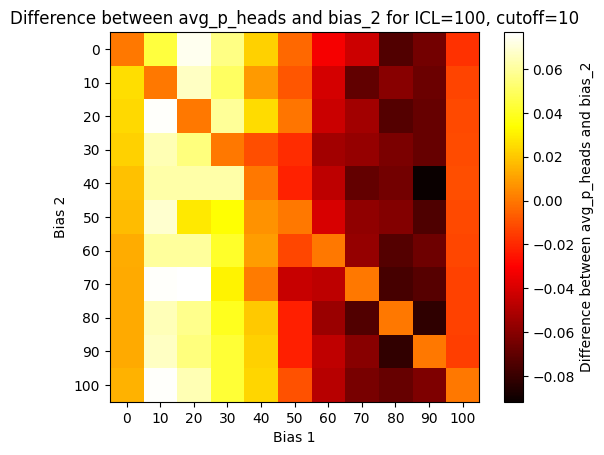

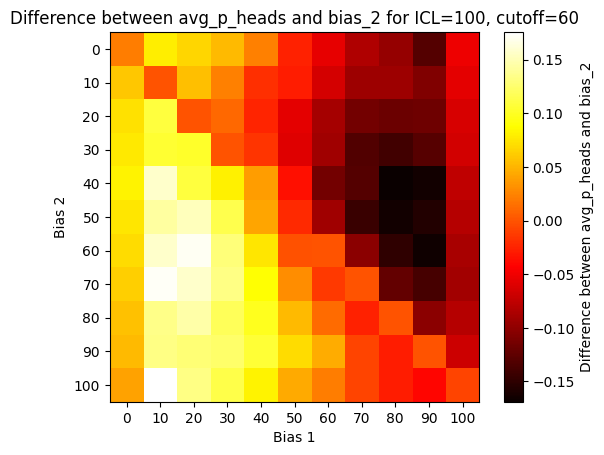

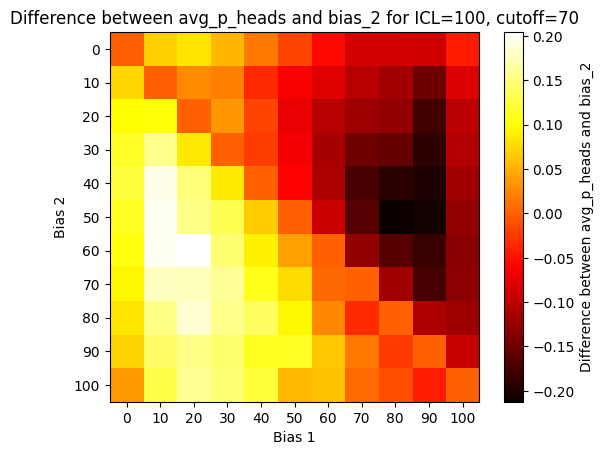

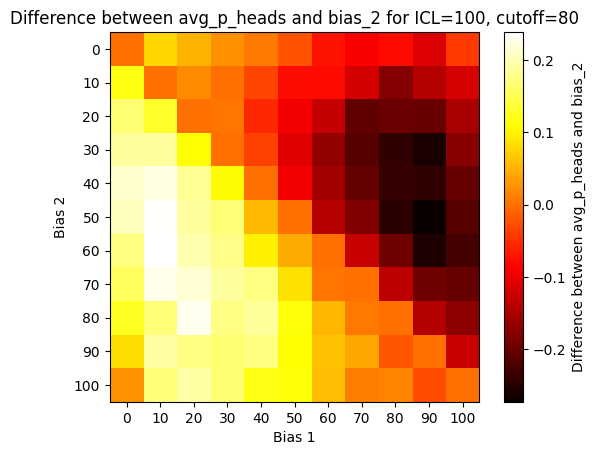

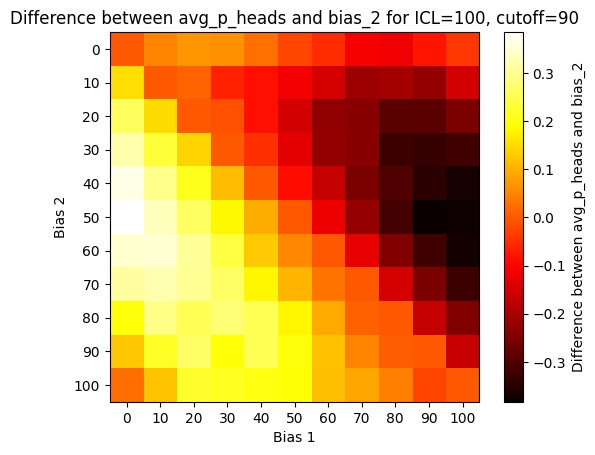

In [7]:
# Plot an image with X axis as bias_1, Y axis as bias_2, cutoff=10, ICL=100
# The value should be the difference between bias_2 and the avg_p_heads

for cutoff in cutoffs:
    xvals = p_biases
    yvals = q_biases

    data = np.zeros((len(xvals), len(yvals)))
    for i, p_bias in enumerate(p_biases):
        for j, q_bias in enumerate(q_biases):
            try:
                stats = load_data(100, cutoff, p_bias, q_bias)
                data[i, j] = (stats['avg_p_heads'] * 100 - q_bias) / 100
            except FileNotFoundError:
                data[i, j] = 0

    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Difference between avg_p_heads and bias_2')
    plt.xlabel('Bias 1')
    plt.ylabel('Bias 2')
    plt.xticks(range(len(xvals)), xvals)
    plt.yticks(range(len(yvals)), yvals)
    plt.title('Difference between avg_p_heads and bias_2 for ICL=100, cutoff={cutoff}'.format(cutoff=cutoff))
    plt.savefig('diff_icl_100_cutoff_{cutoff}.png'.format(cutoff=cutoff))
    plt.show()


In [ ]:
# Plot an image with X axis as bias_1, Y axis as bias_2, cutoff=10, ICL=100
# The value should be the difference between bias_2 and the avg_p_heads

for cutoff in cutoffs:
    xvals = p_biases
    yvals = q_biases

    data = np.zeros((len(xvals), len(yvals)))
    for i, p_bias in enumerate(p_biases):
        for j, q_bias in enumerate(q_biases):
            try:
                stats = load_data(100, cutoff, p_bias, q_bias)
                data[i, j] = np.abs(stats['avg_p_heads'] * 100 - q_bias) / 100
            except FileNotFoundError:
                data[i, j] = -1

    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Difference between avg_p_heads and bias_2')
    plt.xlabel('Bias 1')
    plt.ylabel('Bias 2')
    plt.xticks(range(len(xvals)), xvals)
    plt.yticks(range(len(yvals)), yvals)
    plt.title('Difference between avg_p_heads and bias_2 for ICL=100, cutoff={cutoff}'.format(cutoff=cutoff))
    plt.savefig('diff_icl_100_cutoff_{cutoff}.png'.format(cutoff=cutoff))
    plt.show()
